In [1]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 11284716814206122176
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 5507174400
locality {
  bus_id: 1
  links {
  }
}
incarnation: 7185425518797530301
physical_device_desc: "device: 0, name: NVIDIA GeForce RTX 3060 Ti, pci bus id: 0000:2b:00.0, compute capability: 8.6"
xla_global_id: 416903419
]


In [2]:
# Import necessary modules
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization
from keras.datasets import cifar100
from keras.utils import to_categorical

# Load CIFAR100 dataset
(train_images, train_labels), (test_images, test_labels) = cifar100.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

# Convert class vectors to binary class matrices
train_labels = to_categorical(train_labels, 100)
test_labels = to_categorical(test_labels, 100)

print(train_labels.shape, test_labels.shape)



(50000, 100) (10000, 100)


In [3]:
# AlexNet model architecture
model = Sequential()

# 1st Convolutional Layer
model.add(Conv2D(filters=96, input_shape=(32,32,3), kernel_size=(11,11), strides=(4,4), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))

# 2nd Convolutional Layer
model.add(Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))

# 3rd Convolutional Layer
model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))

# 4th Convolutional Layer
model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))



################################################################################
# 추가한 Convolutional Layer
model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))

# 추가한 Convolutional Layer
model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
################################################################################




# 5th Convolutional Layer
model.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))

# Fully Connected layer
model.add(Flatten())
model.add(Dense(4096, input_shape=(32,32,3,)))
model.add(BatchNormalization())
model.add(Activation('relu'))

# Add Dropout to prevent overfitting
model.add(Dropout(0.5))

# Fully Connected Layer
model.add(Dense(4096))
model.add(BatchNormalization())
model.add(Activation('relu'))
# Add Dropout
model.add(Dropout(0.5))

# Output Layer
model.add(Dense(100))  # Changed to 100 for CIFAR-100
model.add(BatchNormalization())
model.add(Activation('softmax'))

# Model Summary
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 8, 8, 96)          34944     
                                                                 
 batch_normalization (BatchN  (None, 8, 8, 96)         384       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 8, 8, 96)          0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 4, 4, 96)         0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 4, 4, 256)         614656    
                                                                 
 batch_normalization_1 (Batc  (None, 4, 4, 256)        1

In [4]:
# Compile the model
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
# model.fit(train_images, train_labels, epochs=90, 
#           validation_data=(test_images, test_labels))

history = model.fit(train_images, train_labels, epochs=90, 
                    validation_data=(test_images, test_labels))

Epoch 1/90
1563/1563 [==============================] - 21s 11ms/step - loss: 4.4755 - accuracy: 0.0397 - val_loss: 3.9553 - val_accuracy: 0.1166
Epoch 2/90
1563/1563 [==============================] - 17s 11ms/step - loss: 4.0275 - accuracy: 0.0820 - val_loss: 3.7084 - val_accuracy: 0.1580
Epoch 3/90
1563/1563 [==============================] - 17s 11ms/step - loss: 3.8408 - accuracy: 0.1117 - val_loss: 3.5971 - val_accuracy: 0.1796
Epoch 4/90
1563/1563 [==============================] - 17s 11ms/step - loss: 3.7092 - accuracy: 0.1354 - val_loss: 3.4981 - val_accuracy: 0.1969
Epoch 5/90
1563/1563 [==============================] - 17s 11ms/step - loss: 3.6159 - accuracy: 0.1548 - val_loss: 3.4021 - val_accuracy: 0.2204
Epoch 6/90
1563/1563 [==============================] - 18s 11ms/step - loss: 3.5307 - accuracy: 0.1710 - val_loss: 3.3394 - val_accuracy: 0.2188
Epoch 7/90
1563/1563 [==============================] - 20s 13ms/step - loss: 3.4540 - accuracy: 0.1836 - val_loss: 3.3304 -

Epoch 57/90
1563/1563 [==============================] - 17s 11ms/step - loss: 0.7653 - accuracy: 0.8516 - val_loss: 3.3026 - val_accuracy: 0.3315
Epoch 58/90
1563/1563 [==============================] - 18s 11ms/step - loss: 0.7380 - accuracy: 0.8583 - val_loss: 3.2641 - val_accuracy: 0.3296
Epoch 59/90
1563/1563 [==============================] - 17s 11ms/step - loss: 0.7063 - accuracy: 0.8653 - val_loss: 3.2628 - val_accuracy: 0.3328
Epoch 60/90
1563/1563 [==============================] - 17s 11ms/step - loss: 0.6752 - accuracy: 0.8751 - val_loss: 3.2711 - val_accuracy: 0.3364
Epoch 61/90
1563/1563 [==============================] - 16s 10ms/step - loss: 0.6540 - accuracy: 0.8807 - val_loss: 3.2868 - val_accuracy: 0.3429
Epoch 62/90
1563/1563 [==============================] - 16s 10ms/step - loss: 0.6243 - accuracy: 0.8875 - val_loss: 3.3513 - val_accuracy: 0.3391
Epoch 63/90
1563/1563 [==============================] - 16s 10ms/step - loss: 0.5996 - accuracy: 0.8938 - val_loss: 3

In [5]:
#cifar100, 레이어 두개 추가

accuracy = model.evaluate(test_images, test_labels, verbose=1)
print('Test loss:', accuracy[0])
print('Test accuracy:', accuracy[1])


313/313 [==============================] - 1s 4ms/step - loss: 3.6284 - accuracy: 0.3420
Test loss: 3.6284492015838623
Test accuracy: 0.34200000762939453


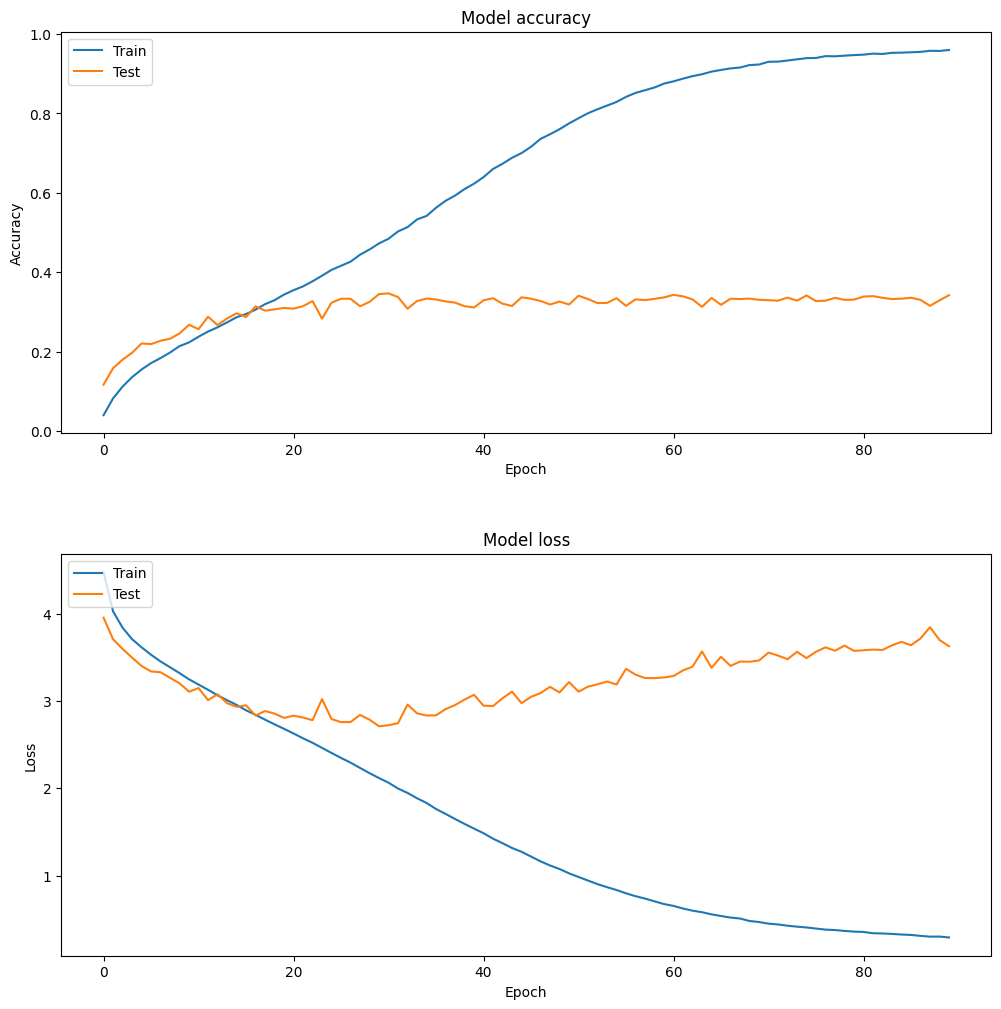

In [6]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 12))

plt.subplot(2, 1, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
plt.subplot(2, 1, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.subplots_adjust(hspace=0.3)
plt.show()
